In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Groceries_dataset.csv')
df.shape
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# check null values
print(df.isna().sum().sum())

# check datatypes
df.dtypes

0


Member_number       int64
Date               object
itemDescription    object
dtype: object

In [6]:
# there are no missing values, but the date value should be converted from object to datetime using to_datetime
df.Date = pd.to_datetime(df.Date)

Text(0, 0.5, 'Qty')

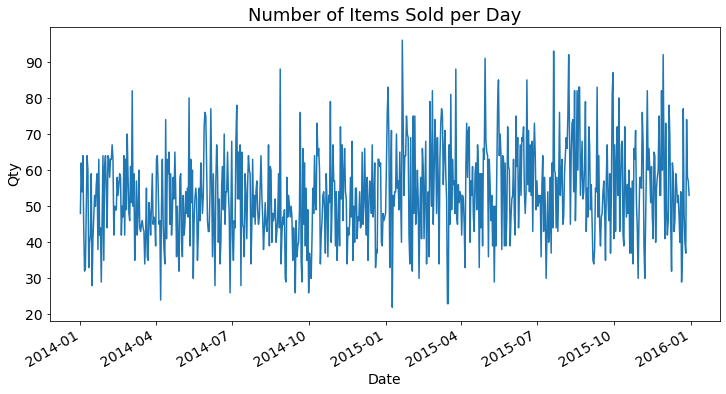

In [8]:
# Calculate the average number of items sold per day by grouping items by date and count the items.

import matplotlib.pyplot as plt
df[['Date','itemDescription']].groupby('Date').count()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Items Sold per Day', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

Text(0, 0.5, 'Qty')

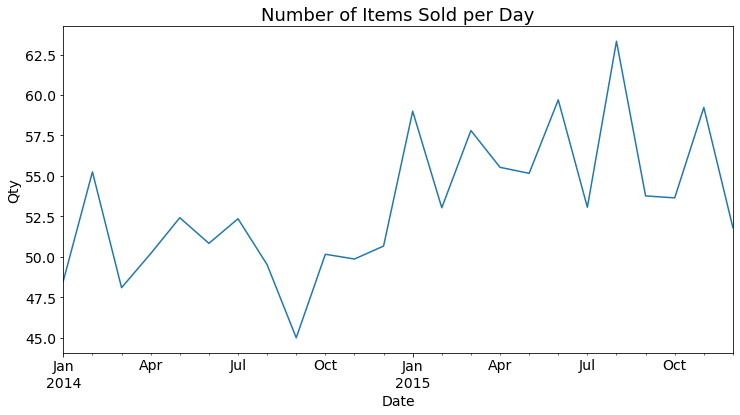

In [9]:
df[['Date','itemDescription']].groupby('Date').count()\
.resample('M').mean()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Items Sold per Day', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

In [10]:
## the trend shows the improving nature of the business due to increasing trend.

In [12]:
## Each row in the dataset represents an item purchased by a customer on a given day. If a customer buys three items 
## at one shopping, there will be three rows with same customer number and date but with different item description.

## lets calculate the ave. number of items per shopping which can be calculated by grouping items by customer number and date.

item_qty = df[['Member_number', 'Date','itemDescription']].groupby(['Member_number','Date']).count().reset_index()

item_qty.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,3
1,1000,2015-03-15,4
2,1000,2015-05-27,2
3,1000,2015-07-24,2
4,1000,2015-11-25,2


In [13]:
# average number of items per shopping

item_qty.itemDescription.mean()

2.590723785337165

Text(0.5, 1.0, 'Histogram of Item Quantities per Shopping')

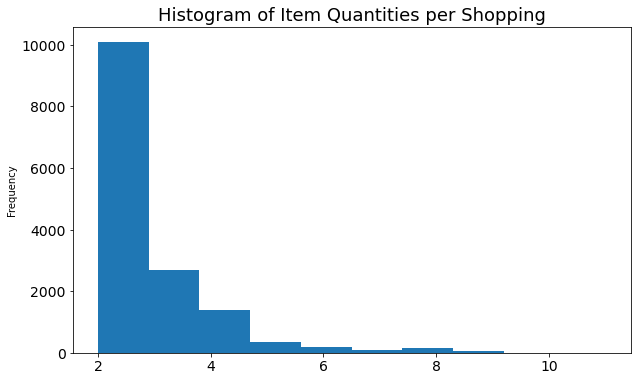

In [14]:
# distribution of the number of items per shopping:

item_qty.itemDescription.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histogram of Item Quantities per Shopping', fontsize=18)

In [16]:
## customers are most likely to buy 2-3 items together.

## To understand the items with higher chance of purchased together, association rule is used with Appriori alogirthm. But, this
## analysis uses itertools without using the appriori algorithm/associatio rules.

## first create a list of items purchased together per shopping:

items = df.groupby(['Member_number', 'Date']).agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()

items.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [17]:
## itertools of python can be used to understand the combinations of items in each row of the "itemDescription" and count 
## the occurrences of each combinations.

import itertools

list(itertools.combinations(items.itemDescription[0], 2))

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'salty snack')]

In [18]:
## the first row of the itemDescription got three items, so the there are 3 combinations of items above.
## now lets create same combination to each row:

combinations_list = []
for row in items.itemDescription:
    combinations = list(itertools.combinations(row,2))
    combinations_list.append(combinations)

In [19]:
combinations_list[:2]

[[('whole milk', 'pastry'),
  ('whole milk', 'salty snack'),
  ('pastry', 'salty snack')],
 [('sausage', 'whole milk'),
  ('sausage', 'semi-finished bread'),
  ('sausage', 'yogurt'),
  ('whole milk', 'semi-finished bread'),
  ('whole milk', 'yogurt'),
  ('semi-finished bread', 'yogurt')]]

In [20]:
## To create a list from above list of lists by using the explode function of pandas but we need to first convert it to 
## a pandas series.

combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

In [21]:
combination_counts[:5]

0              (whole milk, pastry)
1         (whole milk, salty snack)
2             (pastry, salty snack)
3             (sausage, whole milk)
4    (sausage, semi-finished bread)
dtype: object

In [22]:
## value_counts can be used to count the number of occurrences of each combination. The top ten most frequent combinations:

combination_counts.value_counts()[:10]

(whole milk, whole milk)          148
(whole milk, rolls/buns)          143
(sausage, whole milk)             131
(other vegetables, whole milk)    130
(whole milk, soda)                128
(whole milk, yogurt)              126
(whole milk, other vegetables)    113
(other vegetables, rolls/buns)    112
(tropical fruit, whole milk)      101
(other vegetables, soda)           95
dtype: int64

In [23]:
## the repeating whole milk in the first row might be due to multiple milk bought, which created multiple rows of whole milk for the shopping.

## lets count the number of whole milks at each shopping:

whole_milk = df[df.itemDescription == 'whole milk'].groupby(['Member_number', 'Date']).count() \
            .sort_values(by = 'itemDescription', ascending = False).reset_index()

whole_milk

,Member_number,Date,itemDescription
0,1994,2015-11-03,4
1,3518,2014-08-02,3
2,4843,2015-05-13,3
3,2736,2015-02-03,3
4,1370,2015-06-28,3
...,...,...,...
2358,2411,2014-04-21,1
2359,2406,2015-04-09,1
2360,2404,2015-10-15,1
2361,2403,2015-11-28,1


In [ ]:
### that describes the repeating combinations of same item. So, now we can say whole milk is most bought item. and rolls/buns 
### are bought most frequently with whole milk.